In [279]:
# Import the numpy library for numerical operations
import numpy as np
# Import the matplotlib.pyplot module for plotting
import matplotlib.pyplot as plt
# Import the math module for mathematical functions
import math,cmath
from scipy import integrate
from scipy.special import jv,yv,j1

In [280]:
# 定义一个变量f0，其值为2.25乘以10的6次方，代表频率
f0 = 4e6
# 定义一个变量c0，其值为1500.0，代表声速
c0 = 1500.0
# 定义一个变量u，其值为1.0乘以10的3次方，代表质点速度
u = 1.0
# 定义一个变量p，其值为1.0乘以10的3次方，代表声压
p = 1.0e3
# 计算角频率w，公式为2乘以π乘以频率f0
w = 2 * np.pi * f0
# 计算波长lamd，公式为声速c0除以频率f0
lamd = c0 / f0
# 计算波数k，公式为2乘以π除以波长lamd
k = 2 * np.pi / lamd

# 定义变量 F，焦距
F = 11e-3

difL = lamd*0.7

N = 6

Rmax = 7e-3

In [281]:
Rin = np.zeros(N)
Rout = np.zeros(N)
wc = np.zeros(N)
Rc = np.zeros(N)
delay = np.zeros(N)

In [282]:
def CalTrans(F,Rmax,difL,N):
    maxArea = np.pi * (Rmax **2)
    avgArea = (maxArea-(N-1)*2*np.pi*Rmax/2*difL) / N
    maxDifL = difL

    print(maxArea,avgArea,maxDifL)
    
    Rin[0] = 0
    Rout[0] = math.sqrt(avgArea/np.pi)

    print(Rin[0],Rout[0])
    
    for i in np.arange(1,N):
        Rin[i] = Rout[i-1]+maxDifL
        Rout[i] = math.sqrt(Rin[i]**2 + Rout[0]**2)
        print("Rin[%d]:"%i,Rin[i],"Rout[%d]:"%i,Rout[i])
    

    for i in np.arange(N):
        wc[i] = Rout[i] - Rin[i]
        if i == 0:
            Rc[i] = 2/3*(Rout[i] + Rin[i])
        else:
            Rc[i] = (Rout[i] + Rin[i])/2
        delay[i] = (math.sqrt(Rc[i]**2+F**2)-math.sqrt((Rc[0])**2+F**2))/c0
        print("wc[%d]:"%i,wc[i],"Rc[%d]:"%i,Rc[i],"delay[%d]:"%i,delay[i])

In [283]:
def Jf(a,xita):
    if a == 0 or xita == 0:
        ret = 1/2
    else:
        tmp = 2*j1(k*a*math.sin(xita))
        ret = tmp/(k*a*math.sin(xita))

    return ret

In [284]:
def SoundPower(r, Rin, Rout, xita, t):
    """
    计算特定条件下的声功率。

    参数:
    r (float): 距离声源的距离。
    Rin (float): 内半径。
    Rout (float): 外半径。
    xita (float): 角度。
    t (float): 时间。

    返回:
    float: 计算得到的声功率的绝对值。
    """
    
    assert Rin <= Rout, "内半径不能大于外半径"
    assert -np.pi/2 <= xita <= np.pi/2, "角度必须在 -π/2 到 π/2 之间"
    # 计算 t1，w、p、u 应为全局变量，t1 可能代表与距离相关的声功率系数
    t1 = w*p*u/r
    # 计算 t2，调用 Jf 函数结合外半径计算相关值
    t2 = Rout**2*Jf(Rout, xita)
    # 计算 t3，调用 Jf 函数结合内半径计算相关值
    t3 = Rin**2*Jf(Rin, xita)
    # 计算 t4，使用复数指数函数，考虑了时间和距离对声功率的影响
    t4 = cmath.exp(complex(0, 1)*(w*t - k*r))
    # 打印中间计算结果，用于调试
    # print(t1, t2, t3, t4)
    # 返回最终计算得到的声功率的值
    return (t1*(t2 - t3)*t4)


(6, 200)
0.0001539380400258999 2.084577625350728e-05 0.0002625
0.0 0.0025759302526789556
Rin[1]: 0.0028384302526789557 Rout[1]: 0.0038330279109327903
Rin[2]: 0.00409552791093279 Rout[2]: 0.004838260589912057
Rin[3]: 0.005100760589912057 Rout[3]: 0.005714295692582478
Rin[4]: 0.0059767956925824775 Rout[4]: 0.0065082642399905
Rin[5]: 0.0067707642399905 Rout[5]: 0.007244215972774473
wc[0]: 0.0025759302526789556 Rc[0]: 0.0017172868351193037 delay[0]: 0.0
wc[1]: 0.0009945976582538345 Rc[1]: 0.003335729081805873 delay[1]: 2.4094195370690196e-07
wc[2]: 0.0007427326789792672 Rc[2]: 0.004466894250422423 delay[2]: 4.927513937430817e-07
wc[3]: 0.0006135351026704209 Rc[3]: 0.005407528141247267 delay[3]: 7.493709395096001e-07
wc[4]: 0.0005314685474080228 Rc[4]: 0.0062425299662864885 delay[4]: 1.0097669868637076e-06
wc[5]: 0.000473451732783973 Rc[5]: 0.007007490106382486 delay[5]: 1.2727904976782568e-06


/tmp/ipykernel_68634/3942120802.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


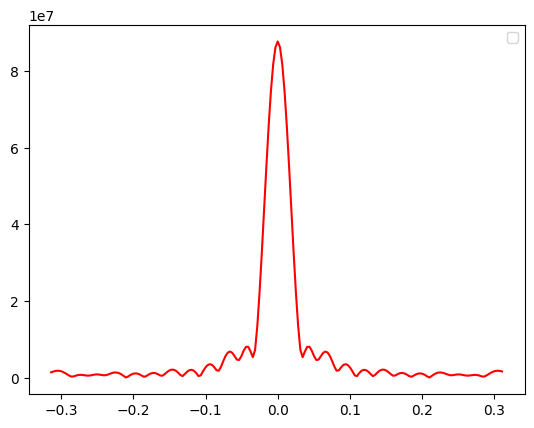

In [285]:
xita = np.arange(-np.pi/10, np.pi/10, np.pi/1000)
Psound = np.zeros([N,len(xita)],dtype=complex)
print(Psound.shape)

CalTrans(F,Rmax,difL,N)
for i in np.arange(0,N):
    for j in np.arange(0,len(xita)):
        Psound[i][j] = SoundPower(F,Rin[i],Rout[i],xita[j],delay[0]-delay[i])   
Psound_sum_abs = np.abs(np.sum(Psound,axis=0)) 


plt.plot(xita,Psound_sum_abs,color='red')
plt.legend()    

In [286]:
def TestPsoundVSdiffL(Rmax,difL):
    CalTrans(F,Rmax,difL,N)
    for i in np.arange(0,N):
        for j in np.arange(0,len(xita)):
            Psound[i][j] = SoundPower(F,Rin[i],Rout[i],xita[j],delay[0]-delay[i])   
    ret = np.absolute(np.sum(Psound,axis=0))
    return ret

dif_List[0] 7.500000000000001e-05
0.00011309733552923255 1.7671458676442585e-05 7.500000000000001e-05
0.0 0.0023717082451262844
Rin[1]: 0.0024467082451262844 Rout[1]: 0.0034075476866463573
Rin[2]: 0.0034825476866463573 Rout[2]: 0.004213447328467023
Rin[3]: 0.0042884473284670235 Rout[3]: 0.0049005898103224215
Rin[4]: 0.004975589810322422 Rout[4]: 0.0055119410338450026
Rin[5]: 0.005586941033845003 Rout[5]: 0.006069506579258406
wc[0]: 0.0023717082451262844 Rc[0]: 0.0015811388300841895 delay[0]: 0.0
wc[1]: 0.0009608394415200729 Rc[1]: 0.002927127965886321 delay[1]: 1.7982805301999574e-07
wc[2]: 0.0007308996418206658 Rc[2]: 0.00384799750755669 delay[2]: 3.603828658841959e-07
wc[3]: 0.000612142481855398 Rc[3]: 0.004594518569394723 delay[3]: 5.386118441959066e-07
wc[4]: 0.0005363512235225807 Rc[4]: 0.005243765422083713 delay[4]: 7.152548264087107e-07
wc[5]: 0.0004825655454134027 Rc[5]: 0.005828223806551704 delay[5]: 8.90377824446917e-07
0.0001539380400258999 2.4281893218371114e-05 7.500000000

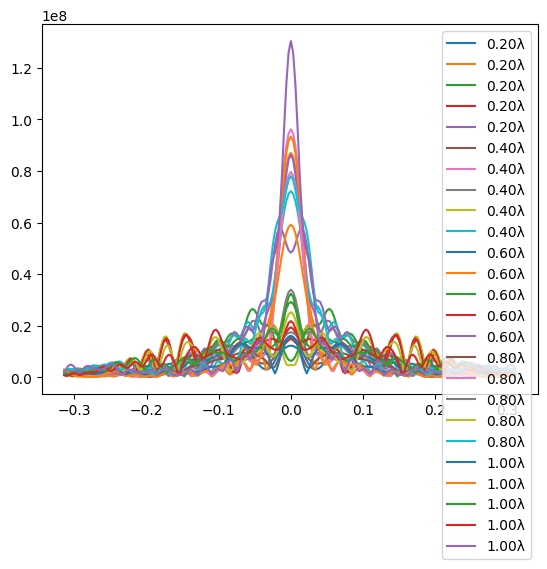

0.00020106192982974675 2.5656340004316642e-05 0.000375
0.0 0.002857738033247041
Rin[1]: 0.0032327380332470407 Rout[1]: 0.004314772515239779
Rin[2]: 0.00468977251523978 Rout[2]: 0.005491869709977205
Rin[3]: 0.005866869709977206 Rout[3]: 0.006525858323662466
Rin[4]: 0.006900858323662466 Rout[4]: 0.00746917078864369
Rin[5]: 0.00784417078864369 Rout[5]: 0.008348513761627133
wc[0]: 0.002857738033247041 Rc[0]: 0.0019051586888313606 delay[0]: 0.0
wc[1]: 0.0010820344819927386 Rc[1]: 0.0037737552742434103 delay[1]: 3.103747397381074e-07
wc[2]: 0.0008020971947374257 Rc[2]: 0.0050908211126084926 delay[2]: 6.38097254540711e-07
wc[3]: 0.0006589886136852598 Rc[3]: 0.006196364016819836 delay[3]: 9.742708284533272e-07
wc[4]: 0.0005683124649812242 Rc[4]: 0.0071850145561530784 delay[4]: 1.3165984513337907e-06
wc[5]: 0.0005043429729834435 Rc[5]: 0.00809634227513541 delay[5]: 1.6630629432182174e-06
0.0002269800692218626 2.9485156050879206e-05 0.000375
0.0 0.0030635627407752998
Rin[1]: 0.003438562740775299

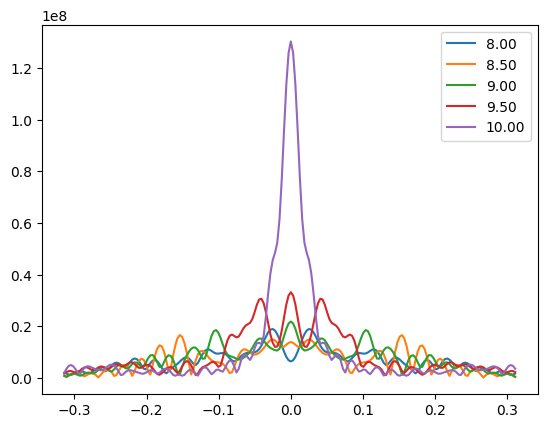

In [287]:
dif_List = np.zeros(5)
Rm_List = np.linspace(6e-3,10e-3,5)
for i in np.arange(0,5,1):
    dif_List[i] = lamd*(i+1)/5
    print("dif_List[%d]"%i,dif_List[i])
    for j in Rm_List:
        Psound_sum_abs = TestPsoundVSdiffL(j,dif_List[i])
        plt.plot(xita,Psound_sum_abs,label='%.2fλ'%((i+1)/5))
plt.legend()  
plt.show()

Rm_List = np.linspace(8e-3,10e-3,5)
for j in Rm_List:
    Psound_sum_abs = TestPsoundVSdiffL(j,lamd)
    plt.plot(xita,Psound_sum_abs,label='%.2f'%(j*1e3))
plt.legend()  
plt.show()

(6, 1000)
-0.0
-4.783948244001281e-07
-9.644641478454506e-07
-1.4475581183376411e-06
-1.927049897781819e-06
-2.4020128598402162e-06


/home/yokay/anaconda3/envs/kwave/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/yokay/anaconda3/envs/kwave/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


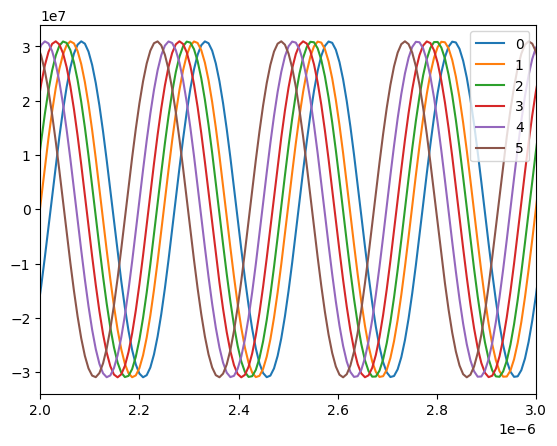

In [288]:
tdelay = np.arange(0, F/c0, F/c0/1000)
Psound_time = np.zeros([N,len(tdelay)],dtype=complex)
print(Psound_time.shape)

for i in np.arange(0,N):
    print(-delay[i])
    for j in np.arange(0,len(tdelay)):
        Psound_time[i][j] = SoundPower(F,Rin[i],Rout[i],1e-9,tdelay[j]-delay[i])

x = tdelay
plt.xlim([2e-6, 3e-6])
plt.plot(x,Psound_time[0],label='0')
plt.plot(x,Psound_time[1],label='1')
plt.plot(x,Psound_time[2],label='2')
plt.plot(x,Psound_time[3],label='3')
plt.plot(x,Psound_time[4],label='4')
plt.plot(x,Psound_time[5],label='5')    
plt.legend()

In [289]:
def AxisSoundPower(r,Rin,Rout,t):
    R1 = math.sqrt(Rout**2+r**2)
    R2 = math.sqrt(Rin**2 +r**2)
    t1 = p*c0*u
    t2 = cmath.exp(complex(0,-1)*(k*R1))
    t3 = cmath.exp(complex(0,-1)*(k*R2))
    t4 = cmath.exp(complex(0,1)*(w*t))

    #print(t1,t2,t3,t4)
    return (t1*(t2-t3)*t4)    

0.0001539380400258999 2.325105812891196e-05 0.00013125
0.0 0.0027204855571509048
Rin[1]: 0.0028517355571509046 Rout[1]: 0.0039412481975365935
Rin[2]: 0.004072498197536594 Rout[2]: 0.00489757932407485
Rin[3]: 0.005028829324074851 Rout[3]: 0.005717531463607506
Rin[4]: 0.0058487814636075065 Rout[4]: 0.006450526046432604
Rin[5]: 0.006581776046432604 Rout[5]: 0.007121854926355962
wc[0]: 0.0027204855571509048 Rc[0]: 0.0018136570381006032 delay[0]: 0.0
wc[1]: 0.0010895126403856889 Rc[1]: 0.003396491877343749 delay[1]: 2.4261430140910925e-07
wc[2]: 0.0008250811265382565 Rc[2]: 0.0044850387608057225 delay[2]: 4.871294275589135e-07
wc[3]: 0.0006887021395326556 Rc[3]: 0.005373180393841178 delay[3]: 7.291136666895913e-07
wc[4]: 0.0006017445828250976 Rc[4]: 0.006149653755020055 delay[4]: 9.69198342784687e-07
wc[5]: 0.0005400788799233575 Rc[5]: 0.006851815486394283 delay[5]: 1.207291843492738e-06


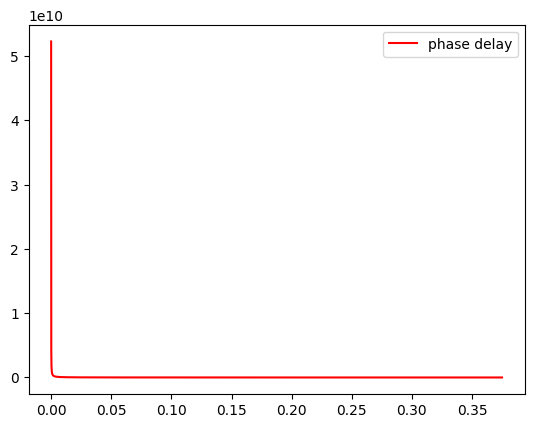

In [290]:
CalTrans(F,Rmax,difL/2,N)

dis = np.arange(1e-5, 1000*lamd, lamd/20)
Psound_axis = np.zeros([N,len(dis)],dtype=complex)

for i in np.arange(0,N):
    for j in np.arange(0,len(dis)):
        Psound_axis[i][j] = SoundPower(dis[j],Rin[i],Rout[i],0,delay[0]-delay[i])

dysum = np.absolute(np.sum(Psound_axis,axis=0))

plt.plot(dis,dysum,color='red',label='phase delay')
plt.legend()  

In [291]:
def TestPsoundAxisVSdiffL(F,difL):
    CalTrans(F,Rmax,difL,N)
    for i in np.arange(0,N):
        for j in np.arange(0,len(dis)):
            Psound_axis[i][j] = AxisSoundPower(dis[j],Rin[i],Rout[i],delay[0]-delay[i])   
    ret = np.absolute(np.sum(Psound_axis,axis=0))
    return ret

dif_List[0] 7.500000000000001e-05
0.0001539380400258999 2.4281893218371114e-05 7.500000000000001e-05
0.0 0.002780137886268713
Rin[1]: 0.002855137886268713 Rout[1]: 0.003985094605686751
Rin[2]: 0.004060094605686752 Rout[2]: 0.004920725035377747
Rin[3]: 0.004995725035377747 Rout[3]: 0.005717205199725357
Rin[4]: 0.005792205199725358 Rout[4]: 0.006424858577618042
Rin[5]: 0.006499858577618043 Rout[5]: 0.007069464491437913
wc[0]: 0.002780137886268713 Rc[0]: 0.0018534252575124754 delay[0]: 0.0
wc[1]: 0.0011299567194180383 Rc[1]: 0.003420116245977732 delay[1]: 2.429165701094832e-07
wc[2]: 0.0008606304296909948 Rc[2]: 0.004490409820532249 delay[2]: 4.841229865572803e-07
wc[3]: 0.0007214801643476102 Rc[3]: 0.005356465117551552 delay[3]: 7.198698004762989e-07
wc[4]: 0.0006326533778926845 Rc[4]: 0.0061085318886717 delay[4]: 9.514957121041478e-07
wc[5]: 0.0005696059138198704 Rc[5]: 0.006784661534527978 delay[5]: 1.1793465378251734e-06
dif_List[1] 0.00015000000000000001
0.0001539380400258999 2.29074

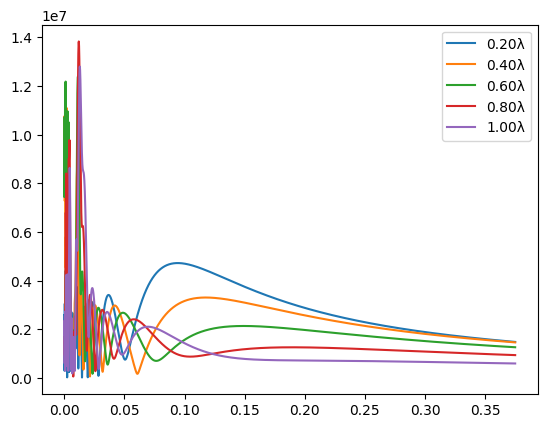

In [292]:
dif_List = np.zeros(5)

for i in np.arange(0,5,1):
    dif_List[i] = lamd*(i+1)/5
    print("dif_List[%d]"%i,dif_List[i])
    Psound_sum_abs_axis = TestPsoundAxisVSdiffL(F,dif_List[i])
    plt.plot(dis,Psound_sum_abs_axis,label='%.2fλ'%((i+1)/5))
plt.legend()  

F 0.01 Fc_List[0] 0.01
0.0001539380400258999 2.222022303945281e-05 0.0001875
0.0 0.0026594955662054913
Rin[1]: 0.0028469955662054915 Rout[1]: 0.003895933831658386
Rin[2]: 0.004083433831658386 Rout[2]: 0.004873125129134174
Rin[3]: 0.005060625129134174 Rout[3]: 0.005716891057584616
Rin[4]: 0.005904391057584616 Rout[4]: 0.006475704627880417
Rin[5]: 0.006663204627880417 Rout[5]: 0.007174344052223428
wc[0]: 0.0026594955662054913 Rc[0]: 0.001772997044136994 delay[0]: 0.0
wc[1]: 0.0010489382654528946 Rc[1]: 0.0033714646989319386 delay[1]: 2.6472398536676067e-07
wc[2]: 0.0007896912974757874 Rc[2]: 0.00447827948039628 delay[2]: 5.340006102852202e-07
wc[3]: 0.000656265928450442 Rc[3]: 0.005388758093359395 delay[3]: 8.023740597235089e-07
wc[4]: 0.0005713135702958005 Rc[4]: 0.006190047842732516 delay[4]: 1.0699013103656862e-06
wc[5]: 0.0005111394243430111 Rc[5]: 0.006918774340051922 delay[5]: 1.3361320486286674e-06
F 0.01 Fc_List[1] 0.012
0.0001539380400258999 2.222022303945281e-05 0.0001875
0.0 0

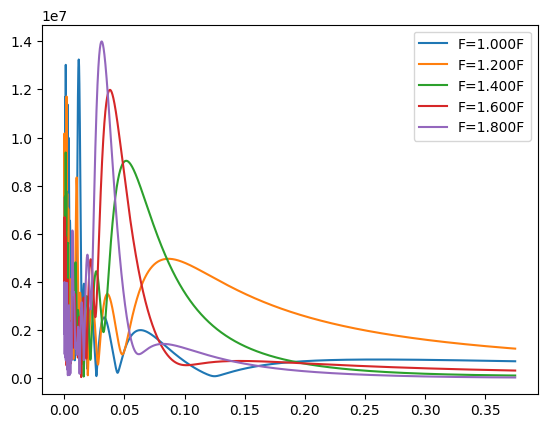

In [293]:
F = 10e-3
Fc_List = np.zeros(5)
for i in np.arange(0,5,1):
    Fc_List[i] = F*(i/5+1)
    print("F %.2f"%F,"Fc_List[%d]"%i,Fc_List[i])
    Psound_sum_abs = TestPsoundAxisVSdiffL(Fc_List[i],lamd/2)
    plt.plot(dis,Psound_sum_abs,label='F=%.3fF'%((i/5+1)))
plt.legend()  

0.0001539380400258999 2.290744643242558e-05 0.00015000000000000001
0.0 0.0027003086243366087
Rin[1]: 0.0028503086243366086 Rout[1]: 0.003926311999909626
Rin[2]: 0.004076311999909626 Rout[2]: 0.004889579346658962
Rin[3]: 0.005039579346658962 Rout[3]: 0.005717431823637099
Rin[4]: 0.005867431823637099 Rout[4]: 0.006458980017904997
Rin[5]: 0.006608980017904997 Rout[5]: 0.007139347557286605
wc[0]: 0.0027003086243366087 Rc[0]: 0.001800205749557739 delay[0]: 0.0
wc[1]: 0.001076003375573017 Rc[1]: 0.003388310312123117 delay[1]: 1.360871116373429e-07
wc[2]: 0.0008132673467493362 Rc[2]: 0.004482945673284293 delay[2]: 2.76938693799011e-07
wc[3]: 0.0006778524769781372 Rc[3]: 0.00537850558514803 delay[3]: 4.19819806489805e-07
wc[4]: 0.0005915481942678985 Rc[4]: 0.006163205920771048 delay[4]: 5.648257675190926e-07
wc[5]: 0.0005303675393816074 Rc[5]: 0.006874163787595801 delay[5]: 7.116856624941187e-07


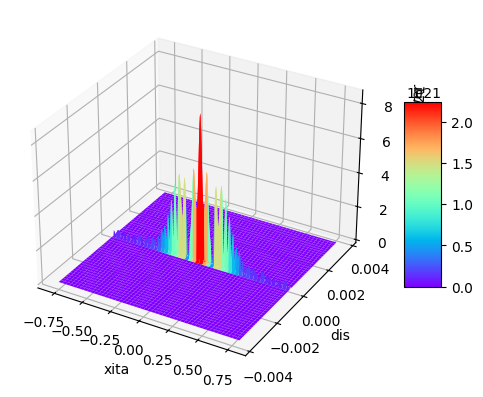

In [294]:
from mpl_toolkits.mplot3d import Axes3D

# 假设 dis 是一个长度为 M 的数组
dis = np.arange(-lamd*10, lamd*10, lamd/10)  # 这里 M 是你需要定义的一个整数
xita = np.arange(-np.pi / 4, np.pi / 4, np.pi / 1000)

CalTrans(20e-3,Rmax,lamd*2/5,N)
# 初始化 Psound 数组，形状为 (M, len(xita))
Psound = np.zeros([N,len(dis), len(xita)], dtype=complex)
Psound_sum = np.zeros([len(dis), len(xita)], dtype=complex)
# 假设 SoundPower 函数可以接受 dis 作为参数
for index in np.arange(N):
    for i in range(len(dis)):
        for j in range(len(xita)):
            Psound[index][i][j] = SoundPower(dis[i], Rin[index], Rout[index], xita[j], delay[0]-delay[index])

for i in range(len(dis)):
        for j in range(len(xita)):
            Psound_sum[i][j] = np.sum(Psound[:,i,j])

# 取 Psound 的绝对值
Psound_abs = np.absolute(Psound_sum)

# 创建三维坐标轴
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 生成网格数据
X, Y = np.meshgrid(xita, dis)

# 绘制三维曲面图
surf = ax.plot_surface(X, Y, Psound_abs, cmap='rainbow')

# 添加颜色条
fig.colorbar(surf, shrink=0.5, aspect=5)

# 设置坐标轴标签
ax.set_xlabel('xita')
ax.set_ylabel('dis')
ax.set_zlabel('Absolute Sound Power')

# 显示图形
plt.show()
